In [ ]:
!pip install spafe
!pip install pip install scikit-plot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvel', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero']
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 8000, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2666, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2666, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2666, 16)          1424      
_________________________

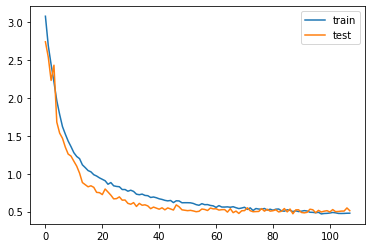

113/113 [==============================] - 8s 70ms/step - loss: 0.5126 - accuracy: 0.8511
Test Accuracy:  85.1111114025116 %
450/450 [==============================] - 32s 71ms/step - loss: 0.2299 - accuracy: 0.9389
Test Accuracy:  93.88889074325562 %


In [ ]:
#importing libraries
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib inline
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import random
from sklearn import metrics
import keras
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import BatchNormalization,Activation,Dropout,LSTM

warnings.filterwarnings("ignore")

class DataConversion:
  def __init__(self,root="/content/drive/MyDrive/archive (1)/augmented_dataset_verynoisy"):
    self.root=root
    self.all_wave = []
    self.all_label = []
  def DataToWave(self,number_of_samples):
    for label in labels:
        waves = [f for f in os.listdir(self.root + '/'+ label) if f.endswith('.wav')]
        for wav in waves[:number_of_sample]:
            samples, sample_rate = librosa.load(self.root + '/' + label + '/' + wav, sr = 16000)
            samples = librosa.resample(samples, sample_rate, 8000)
            if(len(sample)== 8000):
                all_wave.append(samples)
                all_label.append(label)
    return self.all_wave,self.all_label

class Models:
  def cnn_model(self):
    inputs = Input(shape=(8000,1))
    #First Conv1D layer
    conv = Conv1D(8,13, padding='same', activation='relu', strides=1)(inputs)
    conv = MaxPooling1D(3)(conv)
    conv = Dropout(0.3)(conv)

    #Second Conv1D layer
    conv = Conv1D(16, 11, padding='same', activation='relu', strides=1)(conv)
    conv = MaxPooling1D(3)(conv)
    conv = Dropout(0.3)(conv)

    #Third Conv1D layer
    conv = Conv1D(32, 9, padding='same', activation='relu', strides=1)(conv)
    conv = MaxPooling1D(3)(conv)
    conv = Dropout(0.3)(conv)

    #Fourth Conv1D layer
    conv = Conv1D(64, 7, padding='same', activation='relu', strides=1)(conv)
    conv = MaxPooling1D(3)(conv)
    conv = Dropout(0.3)(conv)

    #Fourth Conv1D layer
    conv = Conv1D(128, 5, padding='same', activation='relu', strides=1)(conv)
    conv = MaxPooling1D(3)(conv)
    conv = Dropout(0.3)(conv)


    #Flatten layer
    conv = Flatten()(conv)

    #Dense Layer 1
    conv = Dense(256, activation='relu')(conv)
    conv = Dropout(0.3)(conv)

    #Dense Layer 2
    conv = Dense(128, activation='relu')(conv)
    conv = Dropout(0.3)(conv)


    classification_output = keras.layers.Dense(len(labels), activation="softmax")(conv)

    self.model = Model(inputs, outputs=classification_output)#outputs)
    return self.model , self.model.summary()

  def cnn_compile(self):
    return self.model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  def cnn_fit(self,x_tr,y_tr):
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.0001)
    mc = ModelCheckpoint('/content/drive/MyDrive/Models/best_modelcnnverynoisy.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    return self.model.fit(x_tr, y_tr ,epochs=500, batch_size=32,callbacks=[es,mc], validation_data=(x_val,y_val))
  def model_save(self,path):
    return self.model.save(path)

class Model_test:
  def cnn_predict(self,audio):
    prob=self.model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]
  def evaluation(self,x_test,y_test,batch_size=48):
    results = self.model.evaluate(x_test, y_test, batch_size)
    return results

class Model_accuracy:
  def accuracy():
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    return plt.show()

class DataPrepration:
  def __init__(self,all_label):
    self.all_label = all_label
  def labels_encoder(self):
    le = LabelEncoder()
    y=le.fit_transform(self.all_label)
    classes= list(le.classes_)
    return classes
  def spliting_data(self,test_size,random_state,shuffle):
    x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),
                                                test_size,
                                                np.array(y),
                                                random_state,
                                                shuffle,stratify=y)
    return x_tr,x_val,y_tr,y_val

#main
sample_rate = 16000
root = "/content/drive/MyDrive/archive (1)/augmented_dataset_verynoisy/"
number_of_sample = 600   #datavalues

labels= os.listdir("/content/drive/MyDrive/archive (1)/augmented_dataset_verynoisy/")

all_wave = []
all_label = []
for label in labels:
    waves = [f for f in os.listdir(root + '/'+ label) if f.endswith('.wav')]
    for wav in waves[:number_of_sample]:
        samples, sample_rate = librosa.load(root + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000):
            all_wave.append(samples)
            all_label.append(label)
#printing all labels
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

#DP=DataPrepration(all_label)
#DP.label_encoder()

print(classes)
y=np_utils.to_categorical(y, num_classes=len(labels))
all_wave = np.array(all_wave).reshape(-1,8000,1)

x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

model=Models()
model.cnn_model()
model.cnn_compile()
history=model.cnn_fit(x_tr, y_tr)

#Accuracy Graph
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

model.model_save('/content/drive/MyDrive/Models/model_DLverynoisy.h5')
from tensorflow.keras.models import load_model
loded=load_model('/content/drive/MyDrive/Models/model_DLverynoisy.h5')
test=loded.evaluate(x_val,y_val)
print("Test Accuracy: " , (test[1]*100),'%')
train=loded.evaluate(x_tr,y_tr)
print("Test Accuracy: " , (train[1]*100),'%')